In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import math

In [2]:
edu = pd.read_csv('datos/fiuba_1_postulantes_educacion.csv')

In [3]:
gYe = pd.read_csv('datos/fiuba_2_postulantes_genero_y_edad.csv')

In [4]:
vi = pd.read_csv('datos/fiuba_3_vistas.csv')

In [5]:
post = pd.read_csv('datos/fiuba_4_postulaciones.csv')

In [6]:
av_onl = pd.read_csv('datos/fiuba_5_avisos_online.csv')

In [7]:
av_det = pd.read_csv('datos/fiuba_6_avisos_detalle.csv')

In [35]:
#edu.head(5)
#edu.shape

In [36]:
#gYe.head(5)
#gYe.shape

In [37]:
vi.head(5)

,idAviso,timestamp,idpostulante
0,1111780242,2018-02-23T13:38:13.187-0500,YjVJQ6Z
1,1112263876,2018-02-23T13:38:14.296-0500,BmVpYoR
2,1112327963,2018-02-23T13:38:14.329-0500,wVkBzZd
3,1112318643,2018-02-23T13:38:17.921-0500,OqmP9pv
4,1111903673,2018-02-23T13:38:18.973-0500,DrpbXDP


In [38]:
#post.head(5)

In [39]:
#av_onl.head(5)

In [40]:
#av_det.head(5)

# Only laburo sobre postulantes

## Top 10 avisos con mas postulantes

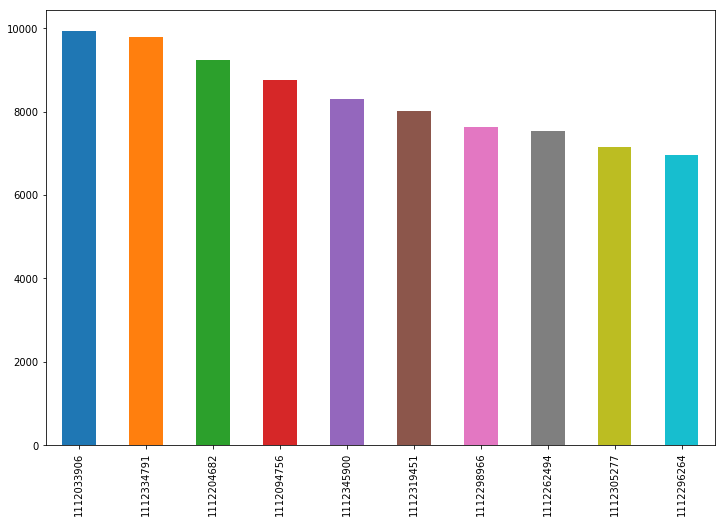

In [41]:
post_x_aviso = post['idaviso'].value_counts().sort_values(ascending=False)
top10avisos = post_x_aviso.head(10)
top10avisos.plot(kind='bar',figsize=(12,8));

## Cantidad de postulaciones por mes

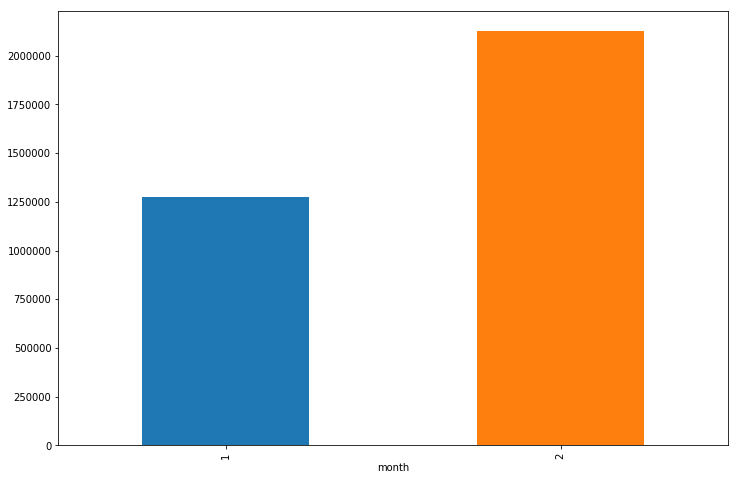

In [42]:
post['fechapostulacion'] = pd.to_datetime(post['fechapostulacion'])
post['month'] = post['fechapostulacion'].dt.month
post.groupby('month').size().plot(kind='bar',figsize=(12,8));

## Cantidad de postulaciones segun dia de la semana

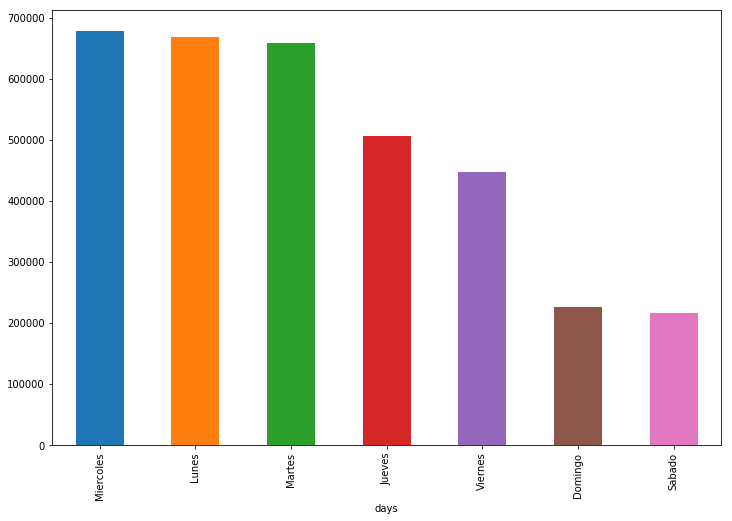

In [43]:
post['fechapostulacion'] = pd.to_datetime(post['fechapostulacion'])
post['days'] = post['fechapostulacion'].dt.dayofweek
diasDeLaSemana = post.groupby('days').size().sort_values(ascending=False)
diasDeLaSemana = diasDeLaSemana.rename({0: 'Lunes',\
                       1: 'Martes',\
                       2: 'Miercoles',\
                       3: 'Jueves',\
                       4: 'Viernes',\
                       5: 'Sabado',\
                       6: 'Domingo'})
diasDeLaSemana.plot(kind='bar',figsize=(12,8));

## Top 10 postulantes mas postulados

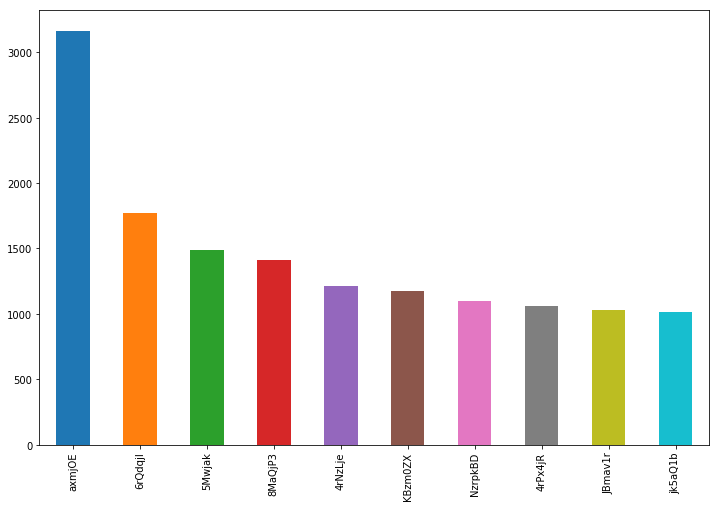

In [44]:
post_x_aviso = post['idpostulante'].value_counts().sort_values(ascending=False)
top10postulantes = post_x_aviso.head(10)
top10postulantes.plot(kind='bar',figsize=(12,8));

## Cantidad de postulaciones por hora

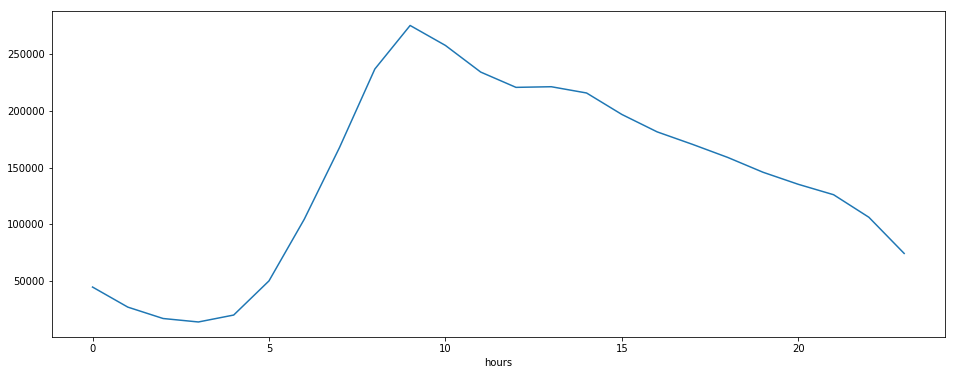

In [45]:
post['fechapostulacion'] = pd.to_datetime(post['fechapostulacion'])
post['hours'] = post['fechapostulacion'].dt.hour
post.groupby('hours').count()['idpostulante'].plot(figsize=(16,6));

# Only laburo sobre vistas

## Top 10 avisos vistos

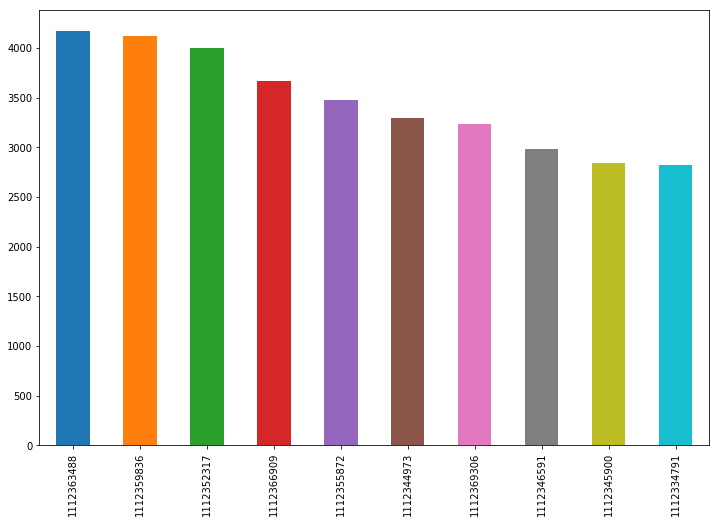

In [46]:
vista_x_aviso = vi['idAviso'].value_counts().sort_values(ascending=False)
top10vistos = vista_x_aviso.head(10)
top10vistos.plot(kind='bar',figsize=(12,8));

## Top 10 postulantes que mas veen

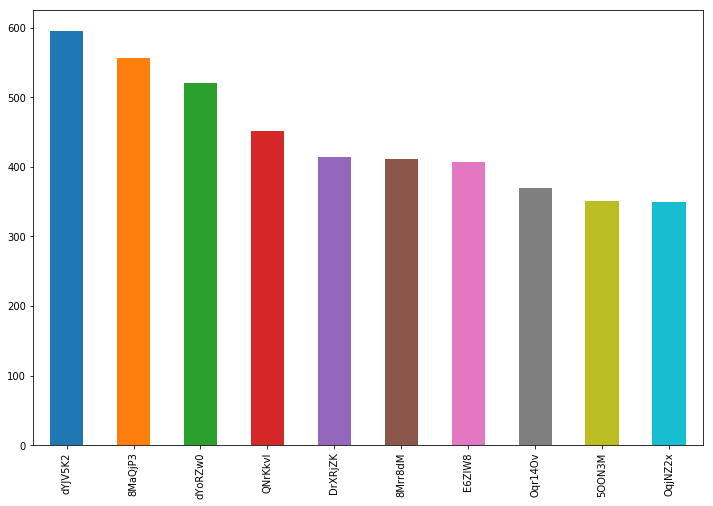

In [47]:
vista_x_postulante = vi['idpostulante'].value_counts().sort_values(ascending=False)
top10postvistas = vista_x_postulante.head(10)
top10postvistas.plot(kind='bar',figsize=(12,8));

## Cantidad de vistas por hora

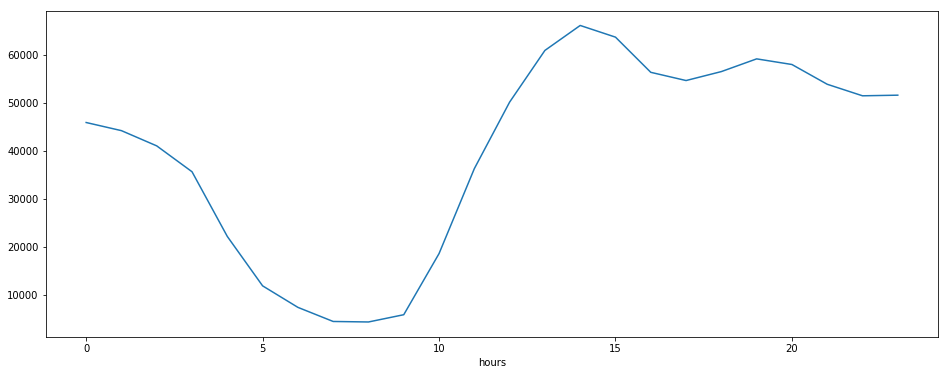

In [48]:
vi['timestamp'] = pd.to_datetime(vi['timestamp'])
vi['hours'] = vi['timestamp'].dt.hour
vi.groupby('hours').count()['idpostulante'].plot(figsize=(16,6));

## Cantidad de vistas segun dia de la semana

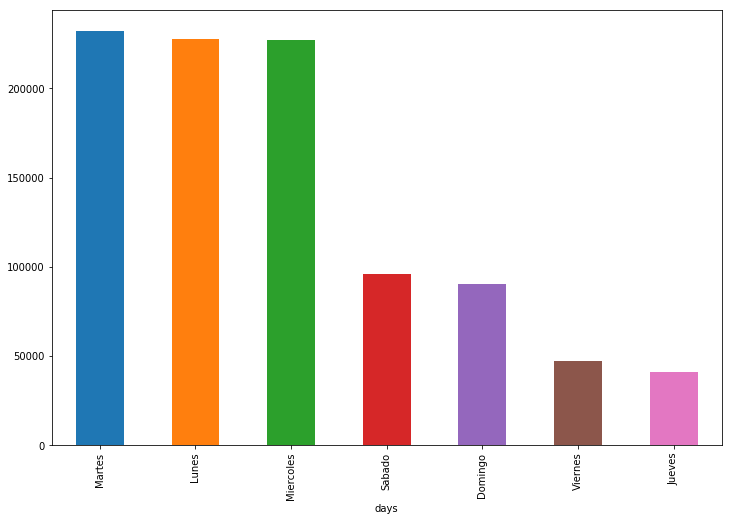

In [49]:
vi['timestamp'] = pd.to_datetime(vi['timestamp'])
vi['days'] = vi['timestamp'].dt.dayofweek
diasDeLaSemanaVistas = vi.groupby('days').size().sort_values(ascending=False)
diasDeLaSemanaVistas = diasDeLaSemanaVistas.rename({0: 'Lunes',\
                       1: 'Martes',\
                       2: 'Miercoles',\
                       3: 'Jueves',\
                       4: 'Viernes',\
                       5: 'Sabado',\
                       6: 'Domingo'})
diasDeLaSemanaVistas.plot(kind='bar',figsize=(12,8));

# Only work sobre av_det

In [8]:
pd.options.display.max_colwidth = 5000

In [9]:
lista_palabras_chotas = ["</p>","<strong>","<p>","</strong>","<br />","<ul>","<li>","<u>","<em>",'<p align="center">',\
                        " </u>",'<span lang="ES">',"</em>","</a>","</span>","</u>","</li>","</ul>",'<p style="">',\
                        '<span style="">',"&quot",'<ul style="">','<li style="">','<div style="">','</div>',\
                        '<div>','<span lang="ES" style="">','<u style="">','<strong style="">',\
                        '<p align="center" style="">','<span style="text-decoration: underline;">','\r\n','\t',\
                        '<span>','<span style="text-decoration: line-through;">','<ol>','</ol>','ü','<p <p',\
                        '<span lang="es" style="">','<em style="">',"&gt"]
av_det['descripcion'].replace(regex=True,inplace=True,to_replace=lista_palabras_chotas,value=r' ')

In [192]:
def lenguajes_mas_usados(x):
    x = x.lower()
    if x.rfind("javascript") != -1:
        return "JavaScript"
    if x.rfind("python") != -1:
        return "Python"
    if x.rfind("java") != -1:
        return "Java"
    if x.rfind("ruby") != -1:
        return "Ruby"
    if x.rfind("php") != -1:
        return "PHP"
    if x.rfind("c++") != -1:
        return "C++"
    if x.rfind("css") != -1:
        return "CSS"
    if x.rfind("c#") != -1:
        return "C#"
    if x.rfind("shell") != -1:
        return "Shell"
    if x.rfind("swift") != -1:
        return "Swift"
    if x.rfind("objective-c") != -1:
        return "Objective-C"
    if x.rfind("typescript") != -1:
        return "TypeScript"
    else:
        return "Sin lenguaje"

In [153]:
av_det_sistemas = av_det.loc[av_det.nombre_area.str.contains('Tecnologia / Sistemas'),:]

In [154]:
av_det_sistemas["leng_prog"] = av_det_sistemas["descripcion"].apply(lenguajes_mas_usados)

/home/fabrizio/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0,0.5,'Cantidad de empresas que solicitan')

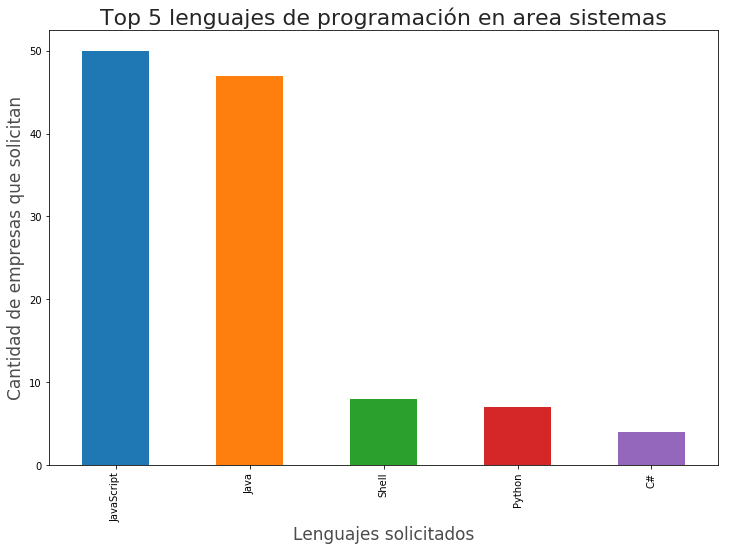

In [280]:
t5lenguajes = av_det_sistemas["leng_prog"].value_counts().sort_values(ascending=False)[1:6]
ax = t5lenguajes.plot(kind='bar', figsize=(12,8),title='Top 5 lenguajes de programación en area sistemas')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_xlabel('Lenguajes solicitados', fontsize=17, alpha=0.7)
ax.set_ylabel('Cantidad de empresas que solicitan', fontsize=17, alpha=0.7)

In [271]:
def idiomas_mas_usados(x):
    x = x.lower()
    if x.rfind("ingles") != -1 or  x.rfind("inglés") != -1:
        return "Inglés"
    if x.rfind("portugués") != -1 or  x.rfind("portugues") != -1:
        return "Portugués"
    if x.rfind("chino") != -1:
        return "Chino"
    if x.rfind("japonés") != -1 or x.rfind("japones") != -1:
        return "Japonés"
    if x.rfind("ruso") != -1:
        return "Ruso"
    if x.rfind("aleman") != -1 or x.rfind("alemán") != -1:
        return "Alemán"
    if x.rfind("hindú") != -1 or x.rfind("hindu") != -1:
        return "Hindú"
    if x.rfind("francés") != -1 or x.rfind("frances") != -1:
        return "Francés"
    else:
        return "No especifica"

In [272]:
av_det_idiomas = av_det
av_det_idiomas['idiomas'] = av_det["descripcion"].apply(idiomas_mas_usados)

In [276]:
av_det_idiomas['idiomas'].value_counts()

No especifica    11000
Inglés            2462
Portugués           23
Ruso                17
Francés             16
Alemán               9
Japonés              4
Chino                3
Name: idiomas, dtype: int64

Text(0,0.5,'Cantidad de empresas que solicitan')

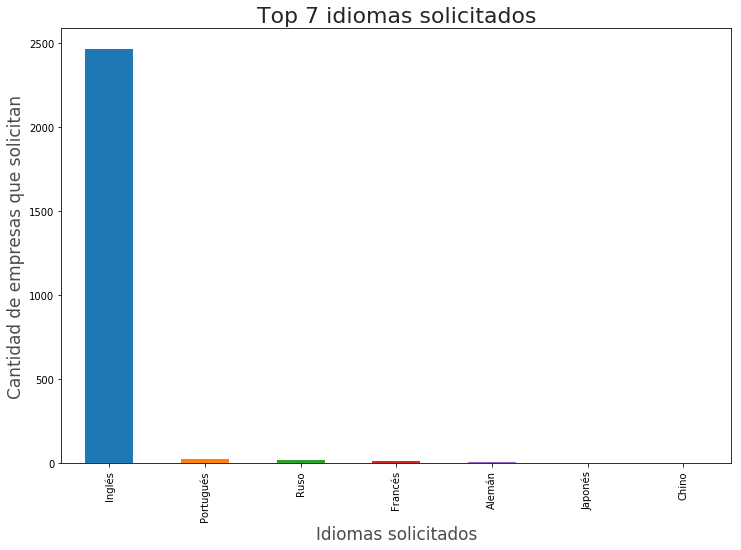

In [282]:
t7idiomas = av_det_idiomas['idiomas'].value_counts().sort_values(ascending=False)[1:8]
ax = t7idiomas.plot(kind='bar', figsize=(12,8),title='Top 7 idiomas solicitados')
ax.set_title(ax.get_title(), fontsize=22, alpha=0.85)
ax.set_xlabel('Idiomas solicitados', fontsize=17, alpha=0.7)
ax.set_ylabel('Cantidad de empresas que solicitan', fontsize=17, alpha=0.7)

In [44]:
import re

In [65]:
def separar(x):
    y = x.lower()
    return re.split(r':', y)

In [66]:
av_asd = av_det['descripcion'].apply(separar)

In [67]:
av_asd

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       